In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df=pd.read_csv('/content/bank-additional-full.csv', sep=';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df['y']= df['y'].replace(['yes','no'],[1,0])

<ipython-input-4-9a7113935a09>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['y']= df['y'].replace(['yes','no'],[1,0])


In [5]:
df=df.drop('duration',axis=1)
df=pd.get_dummies(df)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense, Activation

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [7]:
X = df.drop('y',axis=1)
y = df['y']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 62))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,verbose = 0)


2884/2884 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9022 - loss: 0.2650
Train score: 0.26505380868911743
Train accuracy: 0.9029863476753235
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
********************
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8929 - loss: 0.2892
Test score: 0.283017098903656
Test accuracy: 0.8967387080192566


In [40]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam
from keras.activations import relu, leaky_relu
from keras.regularizers import l2

# 모델 생성
classifier = Sequential()

# 첫 번째 은닉층 (Batch Normalization 포함)
classifier.add(Dense(units=128, kernel_initializer='he_uniform', activation=leaky_relu, input_dim=62))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.2))

# 두 번째 은닉층
classifier.add(Dense(units=64, kernel_initializer='he_uniform', activation=leaky_relu))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.2))

# 세 번째 은닉층
classifier.add(Dense(units=32, kernel_initializer='he_uniform', activation=leaky_relu))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.2))

# 네 번째 은닉층
classifier.add(Dense(units=16, kernel_initializer='he_uniform', activation=leaky_relu))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.1))

# 출력층 (이진 분류이므로 'sigmoid' 사용)
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

# 모델 컴파일
classifier.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
classifier.fit(X_train, y_train, batch_size=32, epochs=150, verbose=1)


Epoch 1/150
901/901 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7251 - loss: 0.5756
Epoch 2/150
901/901 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8897 - loss: 0.3146
Epoch 3/150
901/901 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8939 - loss: 0.2945
Epoch 4/150
901/901 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8929 - loss: 0.2968
Epoch 5/150
901/901 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8930 - loss: 0.2909
Epoch 6/150
901/901 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8931 - loss: 0.2931
Epoch 7/150
901/901 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8979 - loss: 0.2837
Epoch 8/150
901/901 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8924 - loss: 0.2888
Epoch 9/150
901/901 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8999 - loss: 0.2737
Epoch 10/150
901/901 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8964 - loss: 0.2801
Epoch 11/150
901/901 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8946 - loss: 0.2865
Epoch 12/150
901/901 ━━━━━━━━━━━━━━━━━━━

In [41]:
score, acc = classifier.evaluate(X_train, y_train, batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.1)

print('*'*20)
score, acc = classifier.evaluate(X_test, y_test, batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

2884/2884 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9166 - loss: 0.2290
Train score: 0.22857554256916046
Train accuracy: 0.9167215824127197
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
********************
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8954 - loss: 0.2931
Test score: 0.2866814434528351
Test accuracy: 0.8995711207389832


Text(0.5, 23.52222222222222, 'Predicted label')

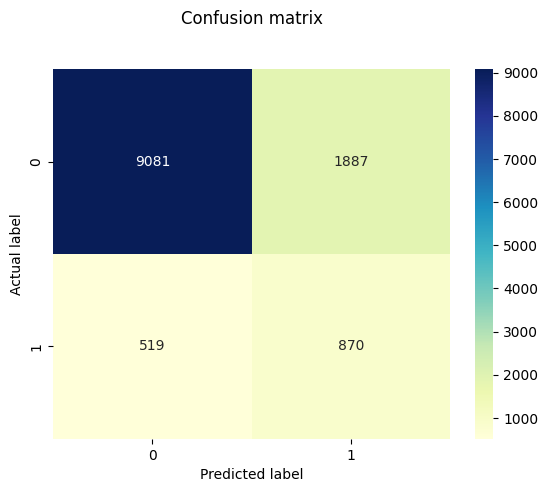

In [42]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt="g")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [43]:
from sklearn.metrics import classification_report, f1_score
print(classification_report(y_test,y_pred))
print(f1_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.83      0.88     10968
           1       0.32      0.63      0.42      1389

    accuracy                           0.81     12357
   macro avg       0.63      0.73      0.65     12357
weighted avg       0.88      0.81      0.83     12357

0.4196816208393632


387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


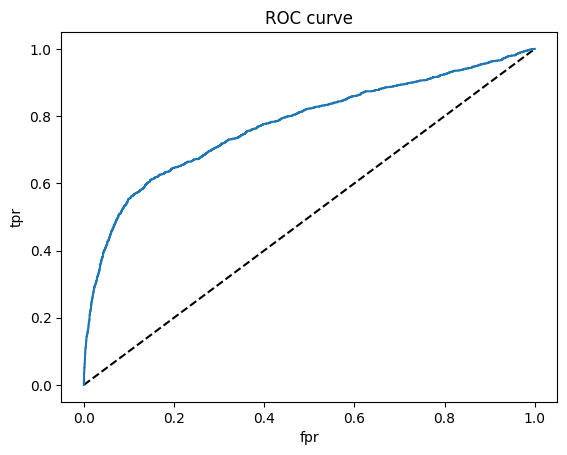

In [44]:
from sklearn.metrics import roc_curve
y_pred_proba = classifier.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [45]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7752627711008502